In [2]:
import textstat
import jieba

In [3]:
jieba.load_userdict(r'C:\Users\sunny\Desktop\量化交易\文本量化\stopwords-master\cn_stopwords.txt')
dict_data = [i.strip() for i in open(r'C:\Users\sunny\Desktop\量化交易\文本量化\stopwords-master\cn_stopwords.txt',encoding = 'utf-8').readlines()]

for word in dict_data:
    jieba.add_word(word)

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\sunny\AppData\Local\Temp\jieba.cache
Loading model cost 0.654 seconds.
Prefix dict has been built successfully.


In [2]:
text =  """多数用户安装APP后，使用一次或几次后，APP就只是躺在手机桌面的角落里了，被动的等待用户唤醒，他不卸载也不使用，造成了较大的资源浪费。

那么现阶段针对提高产品活跃度（DAU、MAU）以及唤醒沉睡用户，需要如何构建APP消息通知策略呢？
我们公司的业务是这样的：

1.有招商的企业入驻我们公司的平台 

2.我们公司将企业的的信息发布的网站或APP上 

3.意向测投资者或创业者在我们平台注册，寻找意向投资企业，浏览企业最新资讯，了解最新优惠信息等等 

4.经过我们平台对投资者或创业者的筛选，帮助招商企业和投资人实现对接。

现在的问题是APP信息推送的需求和APP的核心诉求存在较大差异。消息推送，是希望能拉动非活跃用户，为用户推送最新优惠信息以及新的内容。而APP的主要目的就是帮合作企业找意向投资者。现在我在定义消息通知的类型和明确用户类型这两块都没太想明白。"""
text = ' '.join(jieba.lcut(text))

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\sunny\AppData\Local\Temp\jieba.cache
Loading model cost 0.772 seconds.
Prefix dict has been built successfully.


In [3]:
len(text)

622

In [4]:
textstat.flesch_reading_ease(text)

-104.46

In [5]:
textstat.gunning_fog(text)

86.0

In [20]:
textstat.smog_index(text)

0.0

In [5]:
import re
import jieba.posseg as peg

fileName = "C:/Users/sunny/Desktop/量化交易/文本量化/500个随机样本.txt"
currentFile = open(fileName,encoding='utf-8')
content = currentFile.read()

fog=[]
fog_value=0
for i in range(500):
    text=re.findall(r'"(.*?)"', content, re.DOTALL)[i]
    fog_value = textstat.gunning_fog(text)
    fog.append(fog_value)
print(fog)

[13.6, 16.0, 9.6, 10.4, 15.6, 15.6, 17.2, 11.6, 12.4, 10.0, 8.04, 9.2, 11.2, 18.0, 16.8, 13.6, 40.0, 17.2, 18.8, 15.2, 24.67, 12.4, 15.2, 16.4, 15.6, 14.41, 10.8, 21.6, 29.6, 14.36, 20.4, 12.0, 15.2, 23.2, 16.8, 19.41, 18.4, 22.4, 17.6, 19.6, 15.6, 16.8, 2.0, 16.0, 29.6, 14.4, 16.4, 14.8, 17.6, 12.0, 16.4, 16.4, 9.6, 12.4, 3.6, 7.2, 37.2, 14.0, 13.2, 21.57, 24.97, 18.8, 32.8, 30.4, 15.6, 11.6, 17.6, 18.35, 14.8, 16.4, 57.2, 26.0, 15.6, 20.4, 12.0, 18.4, 2.8, 20.0, 16.0, 10.0, 11.2, 30.14, 6.8, 20.0, 4.0, 12.4, 30.0, 18.8, 18.4, 17.2, 20.4, 17.2, 14.8, 17.2, 10.8, 4.4, 4.8, 16.0, 16.4, 15.14, 9.2, 16.8, 10.4, 15.14, 10.8, 21.2, 10.0, 16.63, 28.4, 14.4, 24.0, 8.8, 8.4, 30.93, 12.8, 17.2, 19.2, 4.4, 12.8, 19.6, 8.8, 22.4, 8.4, 18.0, 14.0, 8.04, 11.6, 17.2, 11.2, 18.4, 21.2, 23.5, 20.8, 17.2, 8.4, 24.0, 16.8, 12.0, 24.2, 19.6, 14.0, 9.2, 14.8, 6.8, 9.2, 16.4, 14.0, 15.6, 14.4, 10.4, 22.0, 34.38, 14.8, 24.4, 25.6, 28.4, 26.4, 12.0, 15.2, 22.8, 19.27, 13.6, 20.0, 14.8, 15.2, 19.6, 28.0, 14.0

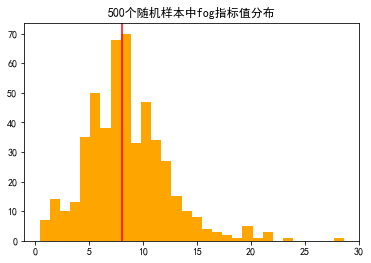

In [14]:
import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False #用来正常显示负号
plt.axvline(fog_mode/2 , color='red',label = 'mode')

fog_new = [x/2 for x in fog]
plt.hist(fog_new, bins=30, color='orange')
plt.title(u"500个随机样本中fog指标值分布")
plt.show()

In [10]:
import numpy as np
 
counts = np.bincount(fog)
#返回众数
fog_mode=np.argmax(counts)